In [1]:
from fuzzywuzzy import process

import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

/opt/homebrew/anaconda3/envs/quant_trading/lib/python3.10/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
market_df = pd.read_csv("./market.csv", index_col=0)
metro_df = pd.read_csv("./metro.csv", index_col=0)
population_df = pd.read_csv("./population.csv", index_col=0)

In [3]:
from sklearn.preprocessing import StandardScaler
ssc = StandardScaler()

In [4]:
market_df.loc[:,:] = ssc.fit_transform(market_df)
metro_df.loc[:,:] = ssc.fit_transform(metro_df)
population_df.loc[:,:] = ssc.fit_transform(population_df)

In [5]:
metro_df['metro_score'] = metro_df.sum(axis=1)
metro_df['metro_score'] = ssc.fit_transform(metro_df[['metro_score']])

market_df['market_score'] = market_df.sum(axis=1)
market_df['market_score'] = ssc.fit_transform(market_df[['market_score']])

population_df['population_score'] = population_df.sum(axis=1)
population_df['population_score'] = ssc.fit_transform(population_df[['population_score']])

In [16]:
metro_df.nlargest(10,'metro_score').reset_index()

,location,2017,2018,2019,2020,2021,2022,metro_score
0,서울특별시_영등포구_여의도동,7.576423,6.083085,7.043431,1.063784,2.797502,5.931457,5.943221
1,서울특별시_마포구_성산동,4.129514,7.341278,5.187033,1.498543,1.362198,6.667879,5.103405
2,서울특별시_강남구_대치동,6.066851,3.940453,3.285673,3.557914,3.318826,4.121132,4.733978
3,서울특별시_용산구_이태원동,1.617779,1.811040,1.676369,4.595680,6.977337,5.286186,4.280581
4,서울특별시_송파구_잠실동,1.575699,2.916434,3.375440,2.659217,5.937495,3.349789,3.861511
5,서울특별시_동작구_동작동,4.583653,4.371030,3.920836,0.013857,0.969661,1.897746,3.070797
6,서울특별시_광진구_자양동,1.547126,1.806583,2.616957,0.458332,1.721175,1.029874,1.789075
7,서울특별시_중구_충무로2가,-0.059073,0.052536,0.023685,2.929092,4.181829,0.808303,1.546698
8,서울특별시_성동구_행당동,0.438668,0.789991,0.379766,0.779384,1.799626,2.289649,1.262301
9,서울특별시_송파구_방이동,1.582298,1.467609,1.168003,1.049336,0.506214,0.329133,1.189318


In [17]:
market_df.drop_duplicates().nlargest(10,'market_score').reset_index()

,location,std,area,distance,market_score
0,서울특별시_금천구_시흥동,1.063613,0.876017,1.950716,1.754931
1,서울특별시_송파구_잠실동,1.377563,1.103954,0.886641,1.519372
2,서울특별시_도봉구_방학동,0.932139,0.957715,1.354895,1.463703
3,서울특별시_마포구_용강동,1.061798,1.042305,1.138652,1.462803
4,서울특별시_은평구_대조동,0.902257,0.720419,1.556526,1.434135
5,서울특별시_서초구_서초동,0.892136,0.874515,1.287944,1.377924
6,서울특별시_용산구_동빙고동,0.342613,0.658948,1.960222,1.336057
7,서울특별시_은평구_신사동,0.669093,0.702102,1.556526,1.320692
8,서울특별시_구로구_오류동,0.922557,1.018192,0.807002,1.239508
9,서울특별시_강북구_미아동,1.112640,0.949649,0.674711,1.234658


In [18]:
addrs = list(set(list(metro_df.index) + list(market_df.index)))

In [19]:
tmp = population_df.copy()
tmp = tmp.reset_index()
tmp['new_location'] = tmp['location'].apply(lambda x: process.extractOne(x, addrs)[0])

population_setted = tmp.sort_values("population_score").groupby("new_location").tail(1)
population_setted = population_setted.drop(columns=['location']).rename(columns={'new_location':'location'}).set_index("location")

In [20]:
population_setted.nlargest(10,'population_score').reset_index()

,location,2020,2021,2022,population_score
0,서울특별시_용산구_이태원동,3.958784,7.464993,5.438696,6.532964
1,서울특별시_중구_명동1가,6.778236,5.127646,1.823043,5.318946
2,서울특별시_중구_소공동,5.822909,5.595944,2.087311,5.232642
3,서울특별시_중구_회현동3가,5.828386,4.862108,2.000767,4.916927
4,서울특별시_중구_을지로4가,4.391334,4.463075,1.525810,4.021569
5,서울특별시_종로구_종로1가,4.749424,4.042176,1.424554,3.958006
6,서울특별시_영등포구_여의도동,2.543718,3.004534,3.725010,3.592705
7,서울특별시_강남구_삼성동,3.775675,3.700231,1.523457,3.486589
8,서울특별시_종로구_인사동,5.048107,2.216827,1.037763,3.216682
9,서울특별시_중구_필동3가,3.567956,2.673181,1.476124,2.989869


In [21]:
len(population_setted)

180

In [89]:
final_df = pd.concat(
    [
        metro_df["metro_score"],
        market_df["market_score"],
        population_setted["population_score"],
    ],
    axis=1,
).dropna()

In [90]:
final_df["score"] = final_df.sum(axis=1)

In [92]:
final_df.sort_values("score", ascending=False)

,metro_score,market_score,population_score,score
location,,,,
서울특별시_용산구_이태원동,4.280581,1.336057,6.532964,12.149602
서울특별시_송파구_잠실동,3.861511,1.519372,2.099316,7.480199
서울특별시_마포구_성산동,5.103405,-0.125879,0.524949,5.502475
서울특별시_강남구_대치동,4.733978,-1.730168,0.873071,3.876881
서울특별시_용산구_한남동,0.083985,1.336057,1.892977,3.313019
...,...,...,...,...
서울특별시_강남구_청담동,-0.247545,-1.730168,0.496518,-1.481195
서울특별시_중랑구_신내동,-0.309566,-0.767269,-0.628557,-1.705392
서울특별시_강동구_성내동,-0.305579,-0.735986,-0.746381,-1.787946


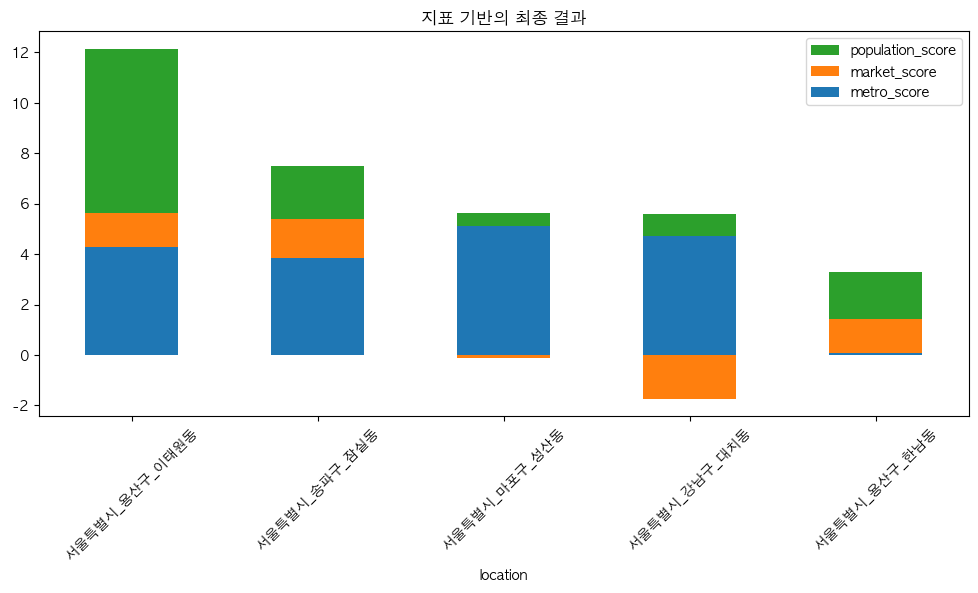

In [101]:
final_df.nlargest(5, "score").drop(columns=['score']).plot.bar(stacked=True, legend="reverse", figsize=(12, 5))
plt.xticks(rotation=45)
plt.title("지표 기반의 최종 결과")
plt.show()